# Generating labels and bounding boxes in text file format

In [ ]:
import pandas as pd

In [ ]:
labels= pd.read_csv(r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_train_labelsd\stage_2_train_labels.csv')

## Taking only patient Ids having target=1

In [ ]:
df=labels[labels['Target']==1]

In [ ]:
df['patientId'].nunique()

6012

There are 6012 patients having pneumonia

### Bounding box in Yolov5 format :

One row per object.

Each row is -class x_center y_center width height.

Box coordinates must be normalized by the dimensions of the image (i.e. have values between 0 and 1)

Class numbers are zero-indexed (start from 0).


In [ ]:
df['x'] = df['x']/1024 + df['width'] / 2048
df['y'] = df['y']/1024 + df['height'] / 2048
df['width'] = df['width'] /1024
df['height'] = df['height']/1024

C:\Users\vikra\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vikra\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vikra\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
df.drop('Target',axis=1,inplace=True)

In [ ]:
for index, patient_id in enumerate(df['patientId'].T.to_dict().values()):
    
    file_name ='{0}.txt'.format(patient_id)
    rows = df[df['patientId']==patient_id]
    row_data = list(rows.T.to_dict().values())
    #print(row_data)
    with open(file_name, 'w') as f:
        for row in row_data:
            f.write(str(0))
            f.write(' ')
            f.write(str(row['x']))
            f.write(' ')
            f.write(str(row['y']))
            f.write(' ')
            f.write(str(row['width']))
            f.write(' ')
            f.write(str(row['height']))
            f.write("\n")
            #f.close()  
        f.close()


shape of dcm images:

In [ ]:
import pydicom as dicom
import os
import cv2
import PIL
from pydicom import dcmread
#folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_train"
# Specify the output jpg/png folder path
folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\trainjpg1024"
images_path = os.listdir(folder_path)
for image in images_path:
    ds = cv2.imread(os.path.join(folder_path, image))
    
    print(ds.shape)

(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1

KeyboardInterrupt: 

## Converting DCM images to JPG format

In [ ]:
import pydicom as dicom
import os
import cv2
import PIL # optional
from pydicom import dcmread
# make it True if you want in PNG format
PNG = False
# Specify the .dcm folder path
folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_trainonlyp"
# Specify the output jpg/png folder path
jpg_folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\trainjpg1024"
images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    ds = dcmread(os.path.join(folder_path, image))
    pixel_array_numpy = ds.pixel_array
    pixel_array_numpy = cv2.resize(pixel_array_numpy, (1024, 1024), interpolation=cv2.INTER_NEAREST)
    
    image = image.replace('.dcm', '.jpg')
    
    cv2.imwrite(os.path.join(jpg_folder_path, image), pixel_array_numpy)
    if n % 50 == 0:
        print('{} image converted'.format(n))

0 image converted
50 image converted
100 image converted
150 image converted
200 image converted
250 image converted
300 image converted
350 image converted
400 image converted
450 image converted
500 image converted
550 image converted
600 image converted
650 image converted
700 image converted
750 image converted
800 image converted
850 image converted
900 image converted
950 image converted
1000 image converted
1050 image converted
1100 image converted
1150 image converted
1200 image converted
1250 image converted
1300 image converted
1350 image converted
1400 image converted
1450 image converted
1500 image converted
1550 image converted
1600 image converted
1650 image converted
1700 image converted
1750 image converted
1800 image converted
1850 image converted
1900 image converted
1950 image converted
2000 image converted
2050 image converted
2100 image converted
2150 image converted
2200 image converted
2250 image converted
2300 image converted
2350 image converted
2400 image conv

Copying data from one folder to another

Creating list of files:

In [ ]:
import os
from pathlib import Path
import shutil
 
src=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\trainjpg1024'


files=os.listdir(src)
l=[]
   
for idx,fname in enumerate(files):
   
    l.append(os.path.splitext(fname)[0])
        

In [ ]:
len(l)

6012

In [ ]:
l

['000db696-cf54-4385-b10b-6b16fbb3f985',
 '000fe35a-2649-43d4-b027-e67796d412e0',
 '001031d9-f904-4a23-b3e5-2c088acd19c6',
 '001916b8-3d30-4935-a5d1-8eaddb1646cd',
 '0022073f-cec8-42ec-ab5f-bc2314649235',
 '002cb550-2e31-42f1-a29d-fbc279977e71',
 '00436515-870c-4b36-a041-de91049b9ab4',
 '00704310-78a8-4b38-8475-49f4573b2dbb',
 '0087bd3a-55a7-4045-b111-b018fa52d361',
 '00a05408-8291-4231-886e-13763e103161',
 '00aecb01-a116-45a2-956c-08d2fa55433f',
 '00c0b293-48e7-4e16-ac76-9269ba535a62',
 '00eeb3c9-a892-4fac-a67a-aaa6cc7ffd5c',
 '00f08de1-517e-4652-a04f-d1dc9ee48593',
 '0100515c-5204-4f31-98e0-f35e4b00004a',
 '0101174b-6643-4d4e-b4ba-b6d41d0ce46a',
 '010ccb9f-6d46-4380-af11-84f87397a1b8',
 '012a5620-d082-4bb8-9b3b-e72d8938000c',
 '013c7df0-d66d-4cb1-b3bc-a70085160311',
 '0174c4bb-28f5-41e3-a13f-a396badc18bd',
 '018951e6-9fb3-4e92-8ce7-e3a018daf93f',
 '019d950b-dd38-4cf3-a686-527a75728be6',
 '01a6eaa6-222f-4ea8-9874-bbd89dc1a1ce',
 '01a7353d-25bb-4ff8-916b-f50dd541dccf',
 '01adfd2f-7bc7-

copying:

In [ ]:
from pathlib import Path
import shutil
 
# defining source and destination
# paths
src=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\text'
trg = r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labellast200'

#files=os.listdir(src)

    # iterating over all the files in
    # the source directory
for f in l[5812:6013]:
    path=os.path.join(src, f)
    path=path+'.txt'
    
        
    shutil.copy2(path, trg)
        

In [ ]:
l[1000]

'320fb85d-09c5-4c0b-be25-91c0086c2c51'

In [ ]:
#0:800  800:1000 800 3000 3000 3200 30005812 6013    3000 5712 5912

# Results

### Taking 1000 images and learning rate as 0.02

In [ ]:
df = pd.read_csv(r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\results177.csv')

In [ ]:
lc=df.columns

In [ ]:
lc

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

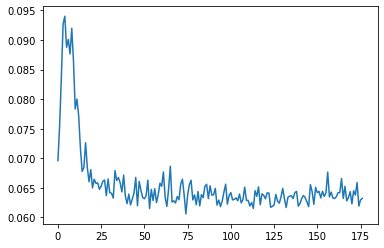

In [ ]:
plt.plot(df[lc[0]],df[lc[8]])

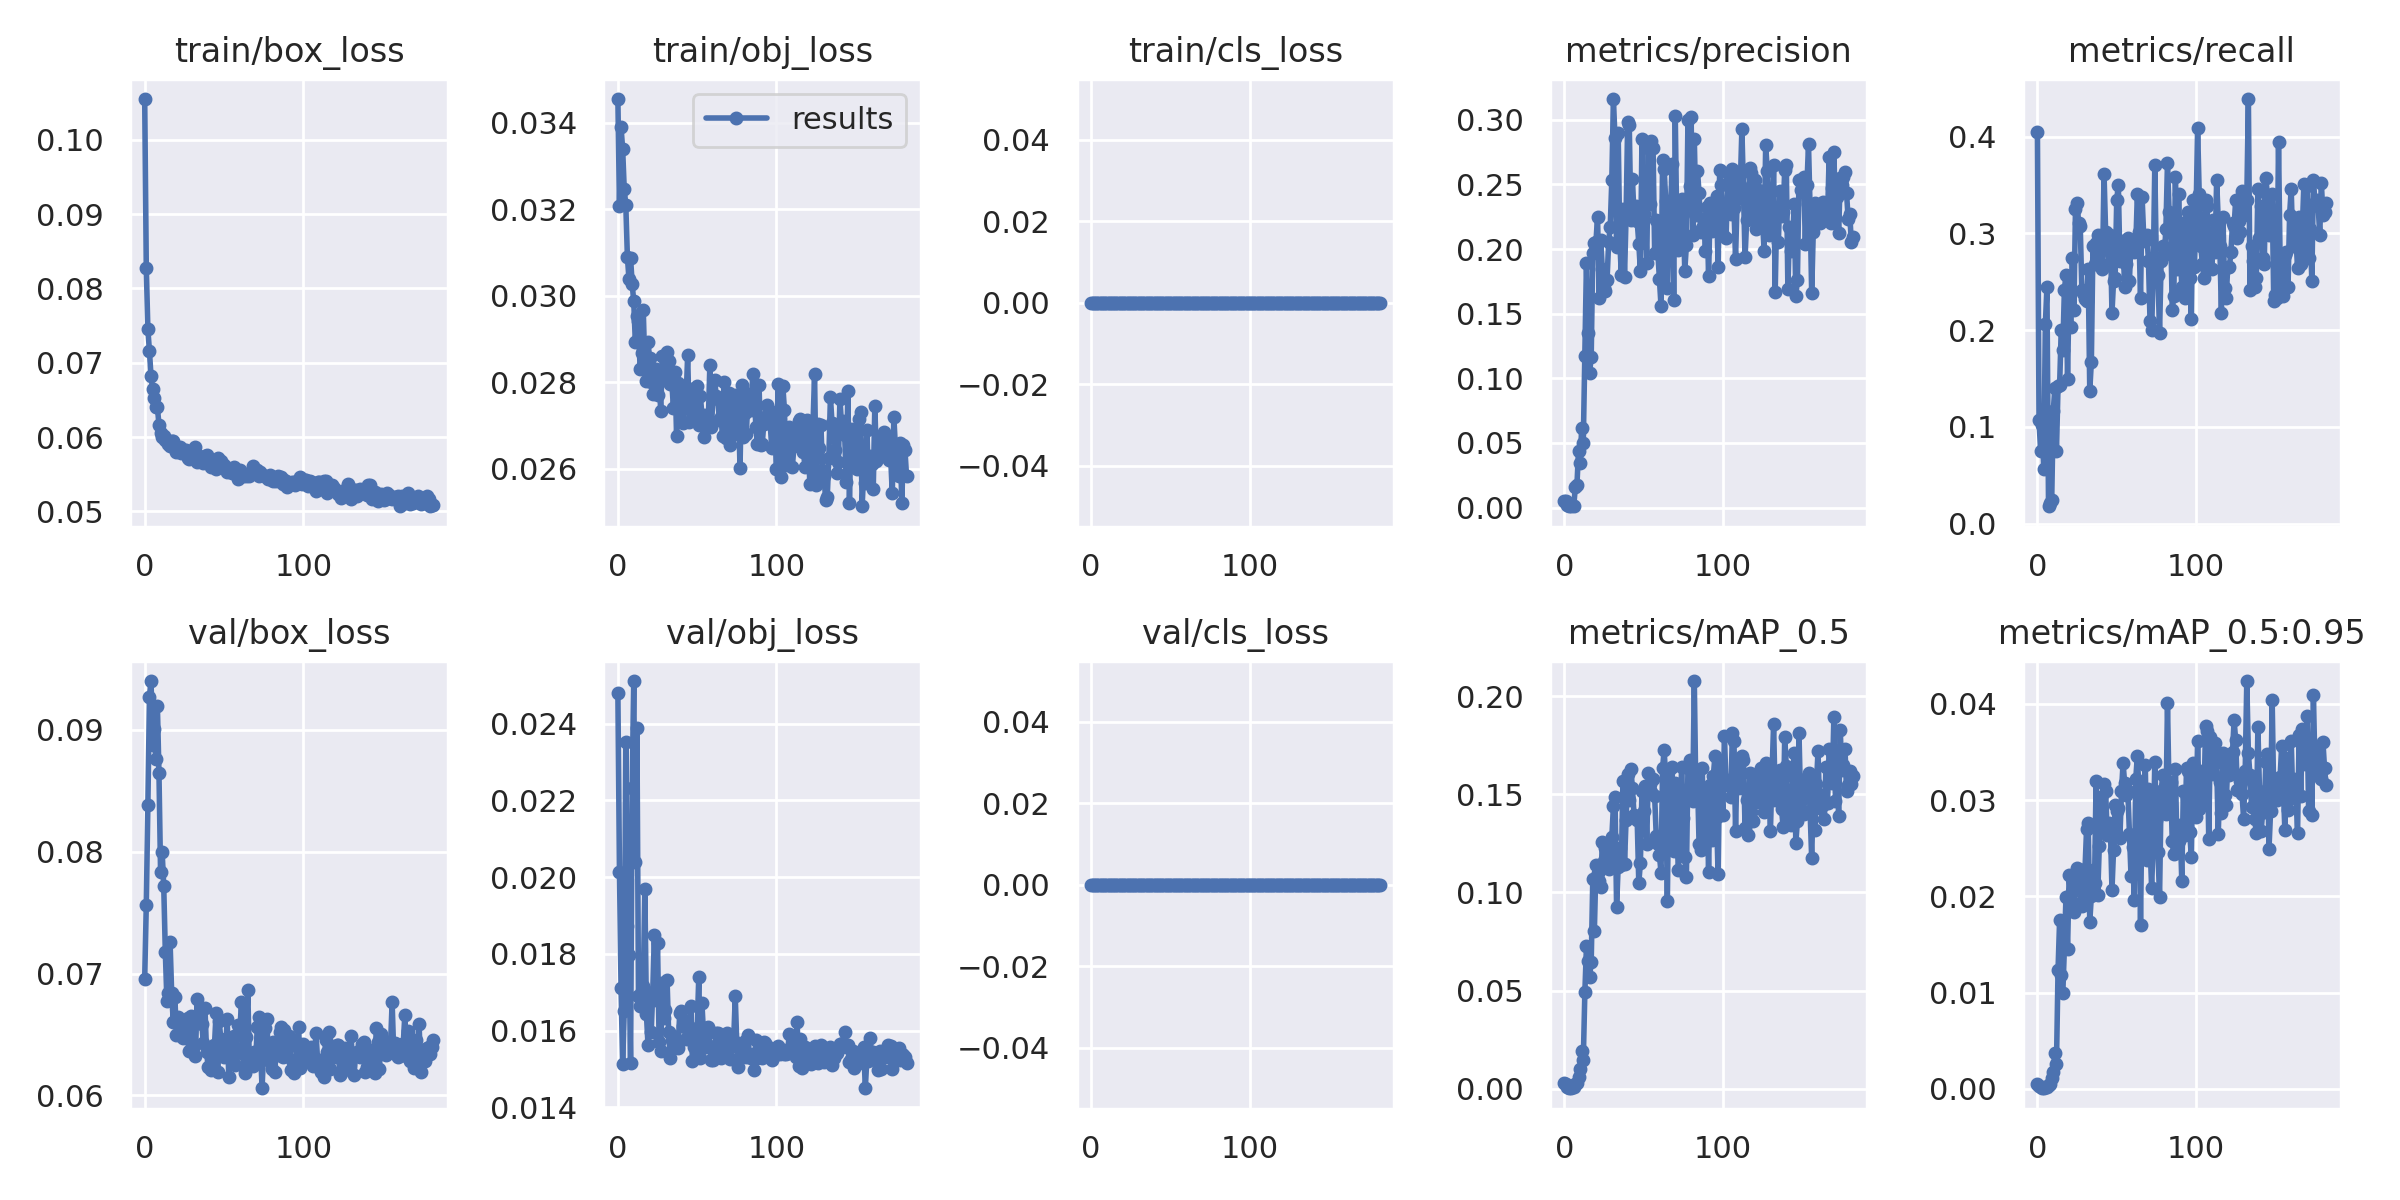

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\vikra\Downloads\yolov5s_results\results.png')

## Plotting actual bounding boxes and predicted bounding boxes:

Red box represent actual bounding box.

Blue box represent predicted bounding box.


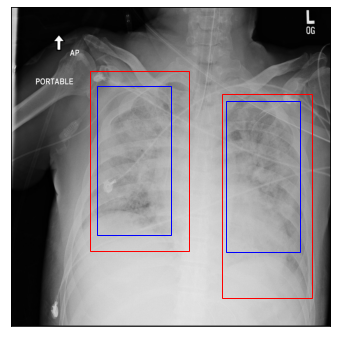

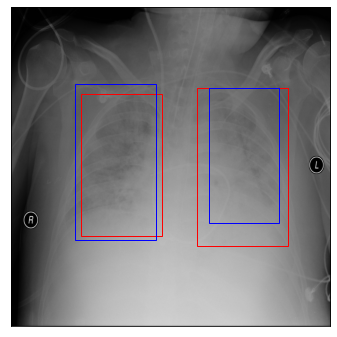

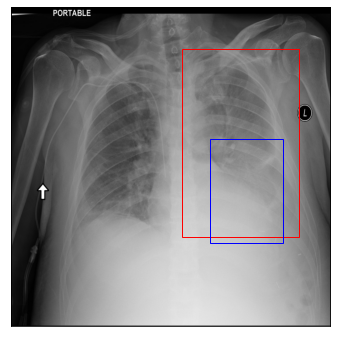

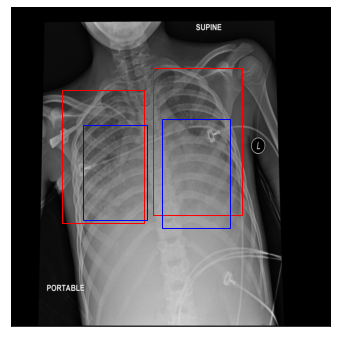

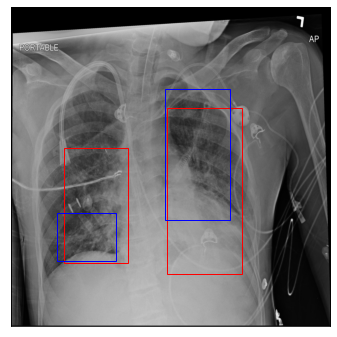

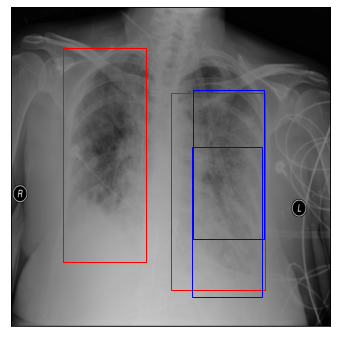

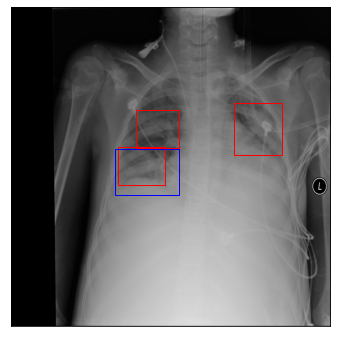

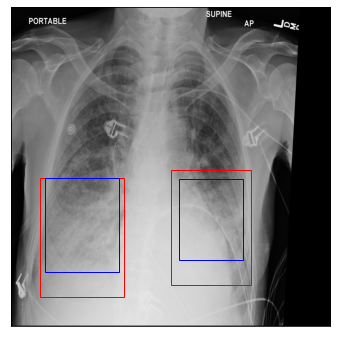

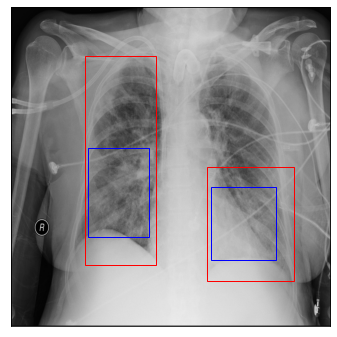

In [ ]:
src=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\exp10003\labels'
lf=[]
for idx,fname in enumerate(os.listdir(src)):
    a=os.path.splitext(fname)[0]
    lf.append(a)
for idx, a in enumerate(lf[0:9]):
    plt.figure(figsize=(20,20))
    plt.subplot(3, 3, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    label_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\Newfolder'
    images_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\Newfolder'
    label_path2=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\exp10003\labels'
    ll=[]
    a_file = open(os.path.join(label_path,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll.append(line_list)
    a_file.close()
    ll2=[]
    a_file = open(os.path.join(label_path2,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll2.append(line_list)
    a_file.close()
    current_axis = plt.gca()
    img=cv2.imread(os.path.join(images_path,a+'.jpg'))
        #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()
    for box in ll:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=1))
    current_axis = plt.gca()
    for box in ll2:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='blue', fill=False, linewidth=1))


### Taking full dataset and learning rate as 0.02

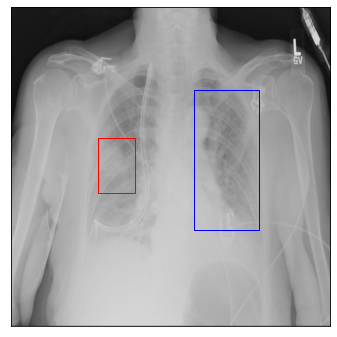

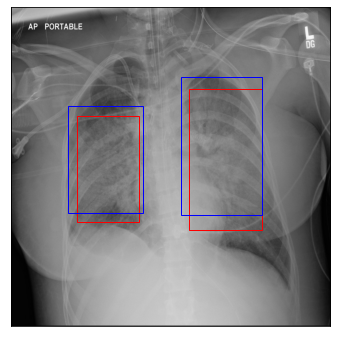

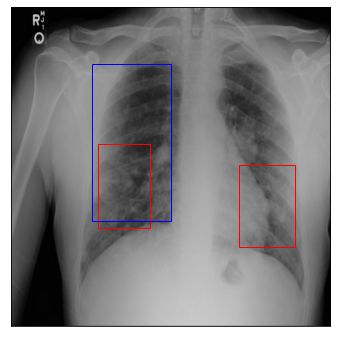

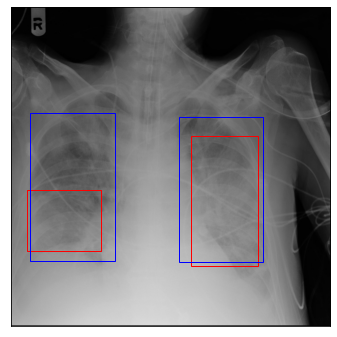

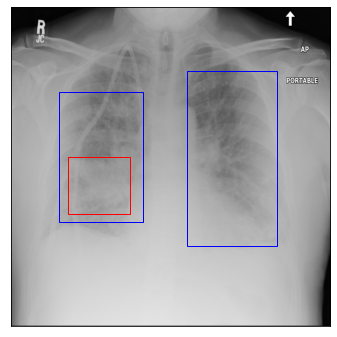

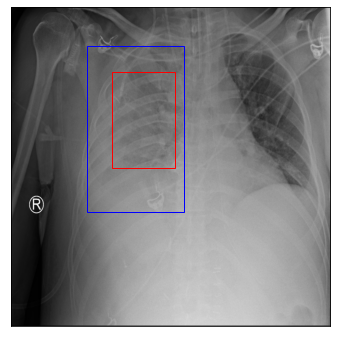

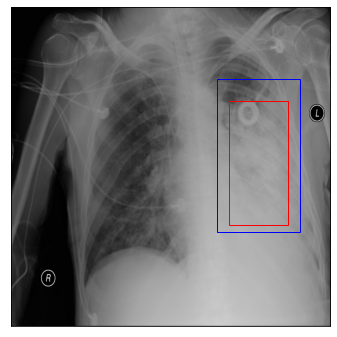

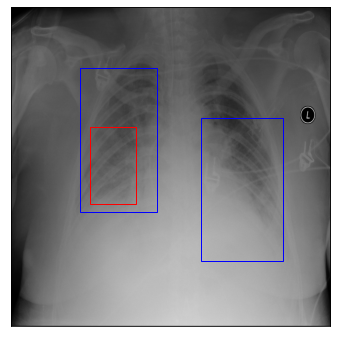

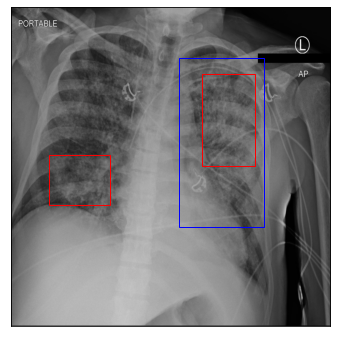

In [ ]:

src=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\3000p\labels'
lf=[]
for idx,fname in enumerate(os.listdir(src)):
    a=os.path.splitext(fname)[0]
    lf.append(a)
for idx, a in enumerate(lf[0:9]):
    plt.figure(figsize=(20,20))
    plt.subplot(3, 3, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    label_path=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labellast200'
    images_path=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\data1\last200'
    label_path2=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\3000p\labels'
    ll=[]
    a_file = open(os.path.join(label_path,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll.append(line_list)
    a_file.close()
    ll2=[]
    a_file = open(os.path.join(label_path2,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll2.append(line_list)
    a_file.close()
    current_axis = plt.gca()
    img=cv2.imread(os.path.join(images_path,a+'.jpg'))
        #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()
    for box in ll:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=1))
    current_axis = plt.gca()
    #bb for yolo
    for box in ll2:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='blue', fill=False, linewidth=1))


IOU has improved a little by taking more training data

# FINAL BEST MODEL(With hyperparameter tuning)

Learning rate and IOU threshold has been reduced which has improved the results
(Hyperparamerters are written after results)


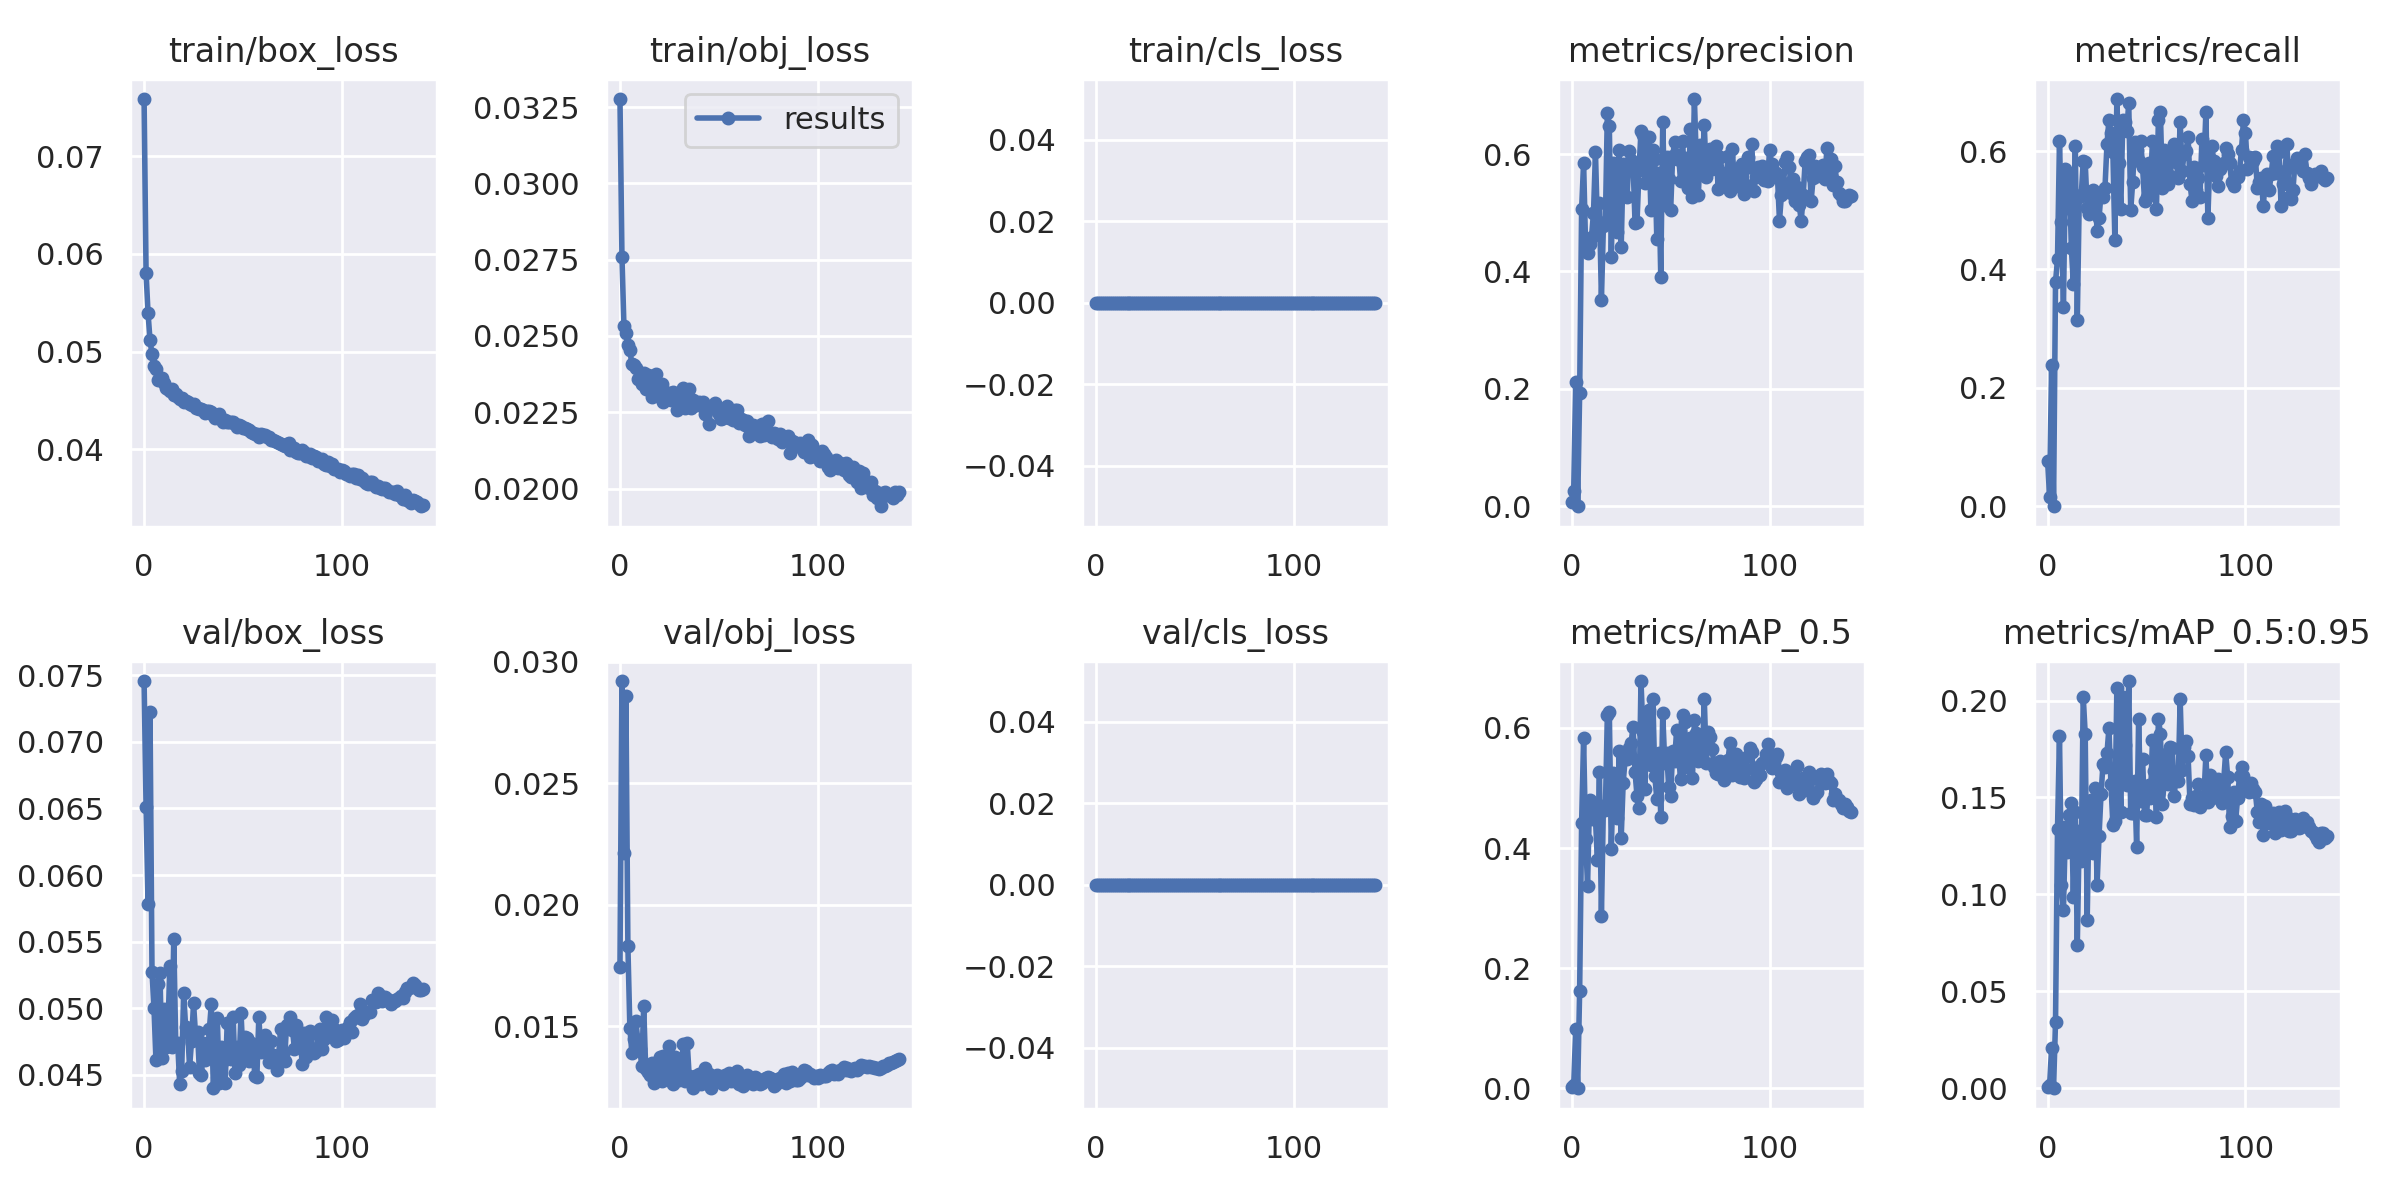

In [2]:
from IPython.display import Image
Image(filename=r'/content/drive/MyDrive/yolov5-master/runs/train/yolov5s_resultsf/results.png')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


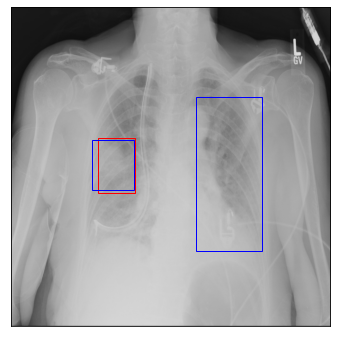

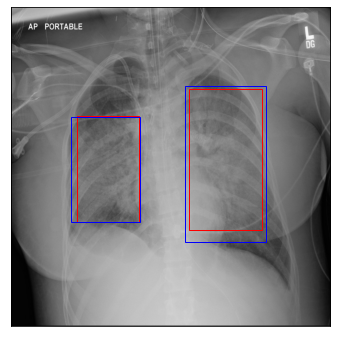

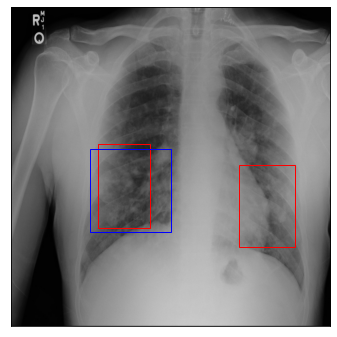

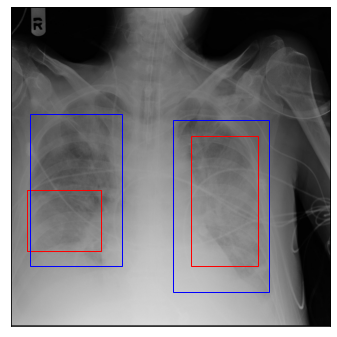

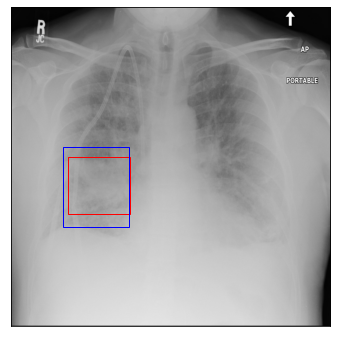

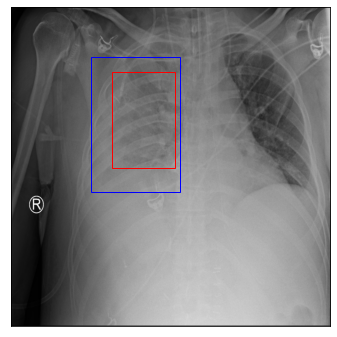

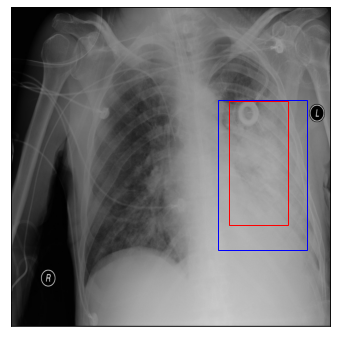

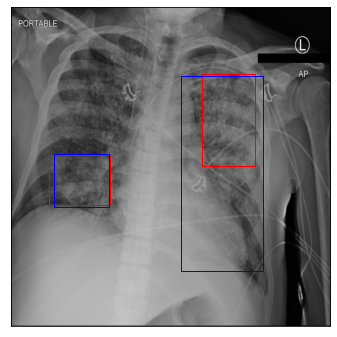

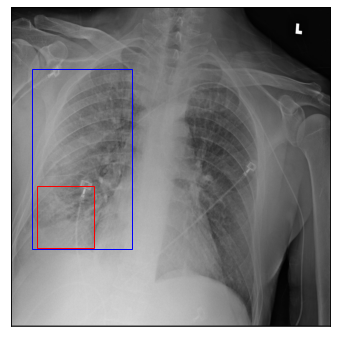

In [ ]:

src=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\6000p\labels'
lf=[]
for idx,fname in enumerate(os.listdir(src)):
    a=os.path.splitext(fname)[0]
    lf.append(a)
for idx, a in enumerate(lf[0:9]):
    plt.figure(figsize=(20,20))
    plt.subplot(3, 3, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    label_path=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labellast200'
    images_path=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\data1\last200'
    label_path2=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\6000p\labels'
    ll=[]
    a_file = open(os.path.join(label_path,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll.append(line_list)
    a_file.close()
    ll2=[]
    a_file = open(os.path.join(label_path2,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll2.append(line_list)
    a_file.close()
    current_axis = plt.gca()
    img=cv2.imread(os.path.join(images_path,a+'.jpg'))
        #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yo+696
        lov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()
    for box in ll:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=1))
    current_axis = plt.gca()
    #bb for yolo
    for box in ll2:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='blue', fill=False, linewidth=1))


In [3]:
import pandas as pd
results=pd.read_csv(r'/content/drive/MyDrive/yolov5-master/runs/train/yolov5s_resultsf/results.csv')

In [6]:
results[35:50]

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
35,35,0.043481,0.023252,0,0.63875,0.68790,0.67810,0.20633,0.043999,0.012940,0,0.009327,0.009327,0.009327
36,36,0.043163,0.022645,0,0.63186,0.57942,0.59404,0.17064,0.046719,0.012852,0,0.009307,0.009307,0.009307
37,37,0.043415,0.022913,0,0.55025,0.50262,0.49894,0.14262,0.049248,0.012486,0,0.009287,0.009287,0.009287
38,38,0.043577,0.022765,0,0.57745,0.65287,0.62725,0.20162,0.044360,0.012964,0,0.009267,0.009267,0.009267
39,39,0.043127,0.022748,0,0.62935,0.64968,0.62952,0.17728,0.047115,0.012806,0,0.009248,0.009248,0.009248
40,40,0.042808,0.022845,0,0.50505,0.63369,0.53861,0.15664,0.046035,0.013055,0,0.009228,0.009228,0.009228
41,41,0.042995,0.022732,0,0.60613,0.68123,0.64890,0.21007,0.044411,0.012626,0,0.009208,0.009208,0.009208
42,42,0.042817,0.022851,0,0.59092,0.50000,0.51935,0.14187,0.048879,0.012902,0,0.009188,0.009188,0.009188
43,43,0.042843,0.022452,0,0.45561,0.54777,0.48217,0.14192,0.047209,0.013285,0,0.009168,0.009168,0.009168
44,44,0.042794,0.022678,0,0.56712,0.61465,0.55814,0.15872,0.046158,0.012800,0,0.009149,0.009149,0.009149


In [ ]:
#41 is tha best epoch having precision as 0.60 , recall as 0.68 and box loss as 0.044

## HYPERPARAMETERS:
 
 lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
 
 lrf: 0.2  # final OneCycleLR learning rate (lr0 * lrf) 
 batch_size=64
 
 momentum: 0.937  # SGD momentum/Adam beta1 
 
 weight_decay: 0.0005  # optimizer weight decay 5e-4
 
 warmup_epochs: 3.0  # warmup epochs (fractions ok)
 
 warmup_momentum: 0.8  # warmup initial momentum
 
 warmup_bias_lr: 0.1  # warmup initial bias lr
 
 box: 0.05  # box loss gain 
 
 cls: 0.5  # cls loss gain 
 
 cls_pw: 1.0  # cls BCELoss positive_weight
 
 obj: 1.0  # obj loss gain (scale with pixels) 
 
 obj_pw: 1.0  # obj BCELoss positive_weight 
 
 iou_t: 0.20  # IoU training threshold 
 
 anchor_t: 4.0  # anchor-multiple threshold 
 
     # anchors: 3  # anchors per output layer (0 to ignore)
     

In [ ]:
SUMMARY AND CONCLUSION:

Why Yolov5-
Yolo( You Only Look Once) is fastest among other object detection algorithms.

Along with speed it also provides good accuracy for even very smaller objects.

It performs both classification and bounding box regression at the same time.

As it has a simple architecture it runs a lot faster than Faster RCNN. It is very good choice for real time applications.


Data preparation:
Step1- As we have bounding box available for only those patients which are pneumonia positive. So images of only positive patients are taken for training.

Step2- Yolov5 have a specific format of input data. So images has been converted from DICOM to jpg and a text file contained information of class and bounding boxes is generated. 
Other preprocessing has also been done.

Step3- The preprocessed images has been saved in the drive so that we do not need to repeat these steps again and we can directly use the modified dataset. 

Training:
Step1-Firstly the model is trained on only 150 images by using the weights of coco dataset and freezing few initial layers as they are independent of the object.
Model was able to detect nearly 45 % of the bounding boxes.

Step2- Model is trained on 1000 images without freezing any layer. Performance of the model is improved.

Step3- After that by using its previous weight the model is trained on full dataset.

Step4- Then using colab pro + the model is trained from starting with full dataset.

Step5- Tried different combination of hyperparameters and compared performance of the model.
Model performance has been improved by reducing the learning rate and IOU threshold. 
The best performing model has been selected.

Output:
By reducing the learning rate from 0.02 to 0.01 and reducing the IOU threshold from 0.3 to 0.2, performance of the model is improved.

The best performing model is obtained by finetuning yolov5 trained on coco dataset.

Model is capable of detecting 197 patients out of 200 from patients having pneumonia positive. 

Only 3 false negatives has been observed out of 200.

Box loss observed is low. Both the actual and predicted bounding boxes are ploted together for comparision and better visualization. 


